# Session 3: Solution

```{contents}

```

## Movies Recommender System

### Download dataset

In [ ]:
!wget "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
!unzip "ml-latest-small.zip"

--2023-08-01 20:02:27--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  --.-KB/s    in 0.1s    

2023-08-01 20:02:27 (7.82 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
import pandas as pd
import numpy as np

**Load movie dataset**

In [ ]:
df_movie = pd.read_csv('ml-latest-small/movies.csv', encoding='latin-1')
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Load rating datase**

In [ ]:
df_rating = pd.read_csv('ml-latest-small/ratings.csv', encoding='latin-1')
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Data Analysis

Some of the things that we need to do include:
- The meaning of columns in the dataset.
- A few basic statistics about the data.
- Is the data type reasonable, are there any columns that contain numeric values but type `string`?
- Is there a column that semantically appears only 1 time, but in fact they appear more than once?
- In DataFrame, do cells containing empty values (`None`, `null`, `NaN`) exist?
- If there are more than 1 DataFrame, we need to check the link between them to see if it makes sense.

In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Observing the results printed above, we see that the column `title` and `genres` have `Dtype=object`, which is `string` in DataFrame

In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Will any `movieId` appear 2 times in `df_movie`?

In [ ]:
df_movie.duplicated(subset=["movieId"], keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
9737    False
9738    False
9739    False
9740    False
9741    False
Length: 9742, dtype: bool

We see that the above code only returns `True` or `False`. To display the full result, we need to nest these `True/False` values into `df_movie`

In [ ]:
df_movie[df_movie.duplicated(subset=["movieId"], keep=False)]

,movieId,title,genres


Do the same with the `title` column

In [ ]:
df_movie[df_movie.duplicated(subset=["title"], keep=False)].sort_values(by=["title"])

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [ ]:
df_movie[df_movie.duplicated(subset=["title"], keep="first")].sort_values(by=["title"])

,movieId,title,genres
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
5601,26958,Emma (1996),Romance
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [ ]:
df_movie[df_movie.duplicated(subset=["title"], keep="last")].sort_values(by=["title"])

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5854,32600,Eros (2004),Drama
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller


Different values of the parameter `keep` (`first`, `last`, `False`)
- `keep="first"` that is, retaining duplicate but minimal values (in this case, that value is the smallest `movieId`) and returns the largest duplicate values.
- `keep="last"` means retaining the largest but duplicate values (in this case, that value is the largest `movieId`) and returning the smallest duplicate values
- `keep=False` means no value retained, returned in full

Observing the above results, we see that the films have the same name but the column value`genre` is different. You can write code to keep movies that have longer`genre`. However, in this step we will do it manually. Can you write code to filter out movies with longer genres?

In [ ]:
# key is the deleted ID, value is the retained ID
keep_dict = {
   64997: 34048,
   168358: 2851,
   32600: 147002,
   26958: 838,
   6003: 144606
}

We delete the duplicate `movieId` in `df_movie` with the command `~ isin`

In [ ]:
df_movie = df_movie[~ df_movie["movieId"].isin(list(keep_dict.keys()))]

In [ ]:
df_movie[df_movie.duplicated(subset=["title"], keep=False)].sort_values(by=["title"])

,movieId,title,genres


Then, we use the `replace` function to update the `movieId` in `df_rating`

In [ ]:
df_rating["movieId"].replace(keep_dict, inplace=True)

At this point, we have a new problem: after replacing `movieId`, `df_rating` has duplicate values in the `userId` and `movieId` columns.

In [ ]:
df_rating[df_rating.duplicated(subset=["userId", "movieId"], keep=False)]

,userId,movieId,rating,timestamp
4590,28,34048,3.5,1234516420
4747,28,34048,3.5,1234850075
11241,68,34048,2.0,1158532246
11451,68,34048,2.5,1230497715
17449,111,144606,4.0,1516468531
17819,111,144606,4.0,1517441257
80405,509,838,3.5,1436031723
80596,509,838,3.5,1436031753


We see that there are 2 cases here:
- 1. The `user-movie` folder `68-34048` has 2 reviews with different scores $\to$ we will keep the line with the larger `timestamp`
- 2. For the remaining pairs, we just need to delete the 1 of 2

For simplicity's sake, we`ll do step 1 manually, not write code

In [ ]:
# Another way to delete any line in DataFrame is to use the drop function and pass it to the index of the line to be deleted
df_rating.drop([11241], axis=0, inplace=True)

# print it out again for testing
df_rating[df_rating.duplicated(subset=["userId", "movieId"], keep=False)]

,userId,movieId,rating,timestamp
4590,28,34048,3.5,1234516420
4747,28,34048,3.5,1234850075
17449,111,144606,4.0,1516468531
17819,111,144606,4.0,1517441257
80405,509,838,3.5,1436031723
80596,509,838,3.5,1436031753


In [ ]:
# Delete remaining dupplicate lines with keep="last"
df_rating.drop_duplicates(subset=["userId", "movieId"], keep="last", inplace=True)

In [ ]:
# Reprint for testing
df_rating[df_rating.duplicated(subset=["userId", "movieId"], keep=False)]

,userId,movieId,rating,timestamp


We only keep movies and users with 50 or more reviews as model training data.

Steps to follow:

1. We use the `value_counts` function to statistics the number of `movieIds`. The result of the `value_counts` function has
  - `index`: the `movieId`
  - `values`: the number of occurrences of the `movieId`
2. From the result of the `value_counts` function we can find out which `movieIds` have `>= 50` occurrences to keep
3. Do the same with the `userId`

In [ ]:
filter = df_rating["movieId"].value_counts().values > 50
indices = df_rating["movieId"].value_counts().index[filter]
df_rating = df_rating[df_rating["movieId"].isin(indices)]

filter = df_rating["userId"].value_counts().values > 50
indices = df_rating["userId"].value_counts().index[filter]
df_rating = df_rating[df_rating["userId"].isin(indices)]

df_movie = df_movie[df_movie["movieId"].isin(df_rating["movieId"].values)]

We check the number of movies and users remaining after filtering

In [ ]:
len(df_rating['movieId'].unique())

436

In [ ]:
len(df_rating['userId'].unique())

260

We use the `merge` function of pandas to combine 2 DataFrames `df_rating` and `df_movie`
- The merge function will automatically find the common column between 2 DataFrames (in this case, **movieId**) to join those 2 DataFrames together

In [ ]:
df = pd.merge(df_rating, df_movie)
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
df.shape

(31985, 6)

Next, we use`LabelEncode` to transform`userI` and`movieI`

In [ ]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

user_encoder.fit(df["userId"].unique())
movie_encoder.fit(df["movieId"].unique())

df["userId"] = user_encoder.transform(df["userId"].values)
df["movieId"] = movie_encoder.transform(df["movieId"].values)

df.head()

,userId,movieId,rating,timestamp,title,genres
0,0,0,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3,0,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,4,0,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,6,0,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,7,0,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Number of users and movies

In [ ]:
df["userId"].unique().shape

(260,)

In [ ]:
df["movieId"].unique().shape

(436,)

## Content-based Recommender System

With the Content-based Recommender System model, we need to build **n models** for **n users** in the system (each user has 1 unique model)

We see that the above method will be very good if we have 1 set of standard features for each item and each user.

In this dataset, we will use the genres column as a feature for each movie.
- We have 19 film genres -> 19 featured, the value of which consists only of 0 or 1 representing zero or yes
- We have 260 users > 260 models, each model consists of 19 weights and 1 bias, symbolizing the user's preferences for each genre of film.
- The model will receive 19 features of any 1 movie and pay points for that movie.





**Split the genres column into values 0, 1**

In [ ]:
# Take out the values in the Genres column and convert it to Numpy Array
genres = df["genres"].values
unique_genre = []

for genre in genres:
  temp = genre.split('|') # # Separate words by character |
  for g in temp:
    if g not in unique_genre:
      unique_genre.append(g)


unique_genre = sorted(unique_genre) # sorting in the aphabetical order

print(unique_genre)
print(len(unique_genre))

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
19


Create a dictionary with **key** as `movieID` and **value** as values 0-1 corresponding to categories

In [ ]:
# Take out the values in the movieID column and convert it to Numpy Array
ids = df["movieId"].values
movie_id_genre_mapping = {}


for id, genre in zip(ids, genres):

  temp = genre.split('|')
  movie_id_genre_mapping[id] = np.zeros(len(unique_genre), dtype=int)  # Add key-value pair

  for g in temp:
    genre_index = unique_genre.index(g) # determine the index of the genre
    movie_id_genre_mapping[id][genre_index] = 1 # assign value 1

print(movie_id_genre_mapping[1])

[0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


To create a DataFrame from 1 dictionary, we need that dict with the following structure
```
my_dict = {
  'column_name_1': [] # contains all values of column 1,
  'column_name_2': [] # contains all values of column 2,
  'column_name_3': [] # contains all values of column 3,
  ...
}
```
We convert the dict `movie_id_genre_mapping` into the above format

In [ ]:
genre_data = {'movieId': []}
for genre in unique_genre:
  genre_data[genre] = []
print(genre_data)

{'movieId': [], 'Action': [], 'Adventure': [], 'Animation': [], 'Children': [], 'Comedy': [], 'Crime': [], 'Documentary': [], 'Drama': [], 'Fantasy': [], 'Film-Noir': [], 'Horror': [], 'IMAX': [], 'Musical': [], 'Mystery': [], 'Romance': [], 'Sci-Fi': [], 'Thriller': [], 'War': [], 'Western': []}


In [ ]:
for key, value in movie_id_genre_mapping.items():
  genre_data['movieId'].append(key)
  for i, v in enumerate(value):
    genre_data[unique_genre[i]].append(v)
print(genre_data)

{'movieId': [0, 2, 3, 16, 18, 20, 23, 32, 39, 41, 42, 44, 49, 51, 58, 61, 64, 77, 80, 82, 86, 90, 91, 97, 98, 99, 102, 104, 105, 107, 109, 110, 113, 122, 123, 129, 131, 132, 133, 134, 136, 137, 140, 141, 142, 147, 149, 150, 151, 152, 154, 155, 157, 161, 165, 167, 168, 170, 171, 173, 180, 189, 190, 193, 194, 195, 199, 200, 205, 209, 210, 214, 218, 219, 222, 223, 224, 225, 229, 231, 233, 234, 238, 239, 241, 243, 244, 245, 246, 247, 248, 251, 252, 253, 254, 257, 259, 264, 267, 269, 270, 272, 273, 274, 275, 276, 277, 278, 281, 284, 289, 290, 293, 295, 299, 10, 12, 62, 65, 84, 87, 95, 101, 108, 119, 120, 121, 130, 143, 146, 158, 166, 172, 175, 183, 187, 202, 207, 213, 216, 237, 250, 256, 263, 265, 266, 282, 283, 285, 288, 300, 301, 306, 311, 312, 313, 314, 315, 318, 327, 1, 4, 5, 6, 7, 8, 9, 11, 13, 14, 19, 21, 22, 25, 26, 27, 28, 29, 30, 31, 33, 34, 37, 38, 40, 43, 45, 46, 47, 48, 52, 53, 54, 55, 56, 57, 59, 60, 63, 66, 67, 68, 69, 71, 72, 73, 74, 76, 78, 79, 81, 83, 85, 94, 96, 100, 103, 

Create 1 DataFrame to contain genre columns

In [ ]:
df_genre = pd.DataFrame(data=genre_data)
df_genre.head()

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,16,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,18,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


We use function `merge` from pandas to combine two DataFrame `df_genre` and `df`
- Function `merge` will automoatically find the common columns of 2 Dataframes(**movieId** in this case) to concate two Dataframes together

In [ ]:
df = pd.merge(df, df_genre)
df.head()

,userId,movieId,rating,timestamp,title,genres,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,0,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,4,0,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,6,0,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,7,0,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Step to perform Content-based Recommender System
- Iterate through all users
  - Get a list of movies and points that the user has rated
  - Train the Linear Regression model separately for that user (please use the `sklearn` library to train Linear Regression for convenience)
  - Save the model for that user.

First, we need information about which movies each user has rated with what scores and what are the characteristics of the movies

We build a `get_user_training_data` function to do this
- `database` in this case is `df`
- Returns 3 `numpy arrays` containing movieIds, ratings and features respectively

In [ ]:
def get_user_training_data(database, user_id):
  filter = (database["userId"] == user_id)
  movie_ids = database[filter]["movieId"].values
  ratings = database[filter]["rating"].values
  # taken from the 6th column onwards for features
  features = database[filter].iloc[:, 6:].values
  return movie_ids, ratings, features

Call functions to test

In [ ]:
test = get_user_training_data(df, user_id=2)
print(test[0].shape) # movieId
print(test[1].shape) # rating
print(test[2].shape) # list of movies' features

(92,)
(92,)
(92, 19)


#### TODO 1 (5 pts)

Implement the Content-based Recommender System following the steps described above (use `LinearRegression` from `sklearn`)

In [ ]:
from sklearn.linear_model import LinearRegression
from tqdm import tqdm


# Get out the list of all users
unique_user = df["userId"].unique()
# variable to store the entire model
all_model = {}

# YOUR SOLUTION
for user_id in tqdm(unique_user):
  user = get_user_training_data(df, user_id=user_id)
  lr = LinearRegression()
  lr.fit(user[2], user[1])
  all_model[user_id] = lr

100%|██████████| 260/260 [00:00<00:00, 327.34it/s]


So we have the whole model to predict the score for each user.

To suggest movies for any 1 user, we do the following steps:
- Find ids of movies that users have not reviewed
- Take out the featured set of those films
- Use the model with the corresponding key in `all_model` to predict the score
- If the movie is predicted high score $→$ suggest that movie to the user

In fact:
- If we find predicting points difficult, we can predict whether the user will like the movie or not (based on the `rating` to create the Like/Dislike column and then use LogisticRegression to do it)
- I will not train the model on the entire series that the user has evaluated, but will split it into 2 episodes of Train and Test in an 80-20 ratio. Then train on Train and evaluate on Test

## Item-based Collaborative Filtering

Look at the image carefully to understand the logic

![](https://i.imgur.com/HEqxtJF.png)

We create a Word Utility Matrix using the function `pivot_table`
- `index`: rows
- `columns`: columns

In [ ]:
utility_matrix = df.pivot_table(index=['movieId'], columns=['userId'], values='rating').reset_index(drop=True)
utility_matrix

In [ ]:
# create utility matrix
utility_matrix = df.pivot_table(index=['movieId'], columns=['userId'], values='rating').reset_index(drop=True)
# fill empty values with 0
utility_matrix.fillna(0, inplace=True)
# convert DataFrame to numpy array
utility_matrix = utility_matrix.values
print(utility_matrix.shape)

(436, 260)


In [ ]:
utility_matrix

array([[4. , 0. , 0. , ..., 4. , 2.5, 5. ],
       [0. , 0. , 4. , ..., 0. , 2. , 0. ],
       [4. , 0. , 5. , ..., 0. , 2. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 3.5],
       [0. , 0. , 0. , ..., 0. , 0. , 4.5],
       [0. , 0. , 0. , ..., 0. , 0. , 3. ]])

Function to compute consine similarity for two vectors

In [ ]:
def cosine(a, b):
  # to avoid denominator = 0 --> add a very samll number call epsilon to the denominator
  return a.dot(b) / ((np.linalg.norm(a) * np.linalg.norm(b)) + np.finfo(np.float64).eps)

Compute item-to-item similarity matrix

In [ ]:
from tqdm.notebook import tqdm

movie_len = df["movieId"].unique().shape[0]

# Create a square matrix with a shape equal to the number of films containing only zero
item_to_item_similarity_matrix = np.zeros((movie_len, movie_len))

for i in tqdm(range(movie_len)):
  for j in range(movie_len):

    # Take out one pair of item
    item_1 = utility_matrix[i]
    item_2 = utility_matrix[j]

    # Find rating > 0 of each item
    index_not_zero = (item_1 > 0) & (item_2 > 0)

    # Compute the cosine similarity and assign to the similarity/square matrix
    item_to_item_similarity_matrix[i,j] = cosine(item_1[index_not_zero], item_2[index_not_zero])

  0%|          | 0/436 [00:00<?, ?it/s]

Check if the diagonal of the `item_to_item_similarity_matrix` is equal to 1.

In [ ]:
item_to_item_similarity_matrix.diagonal()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

We take out the positions in `utility_matrix` where there is `rating=0`

In [ ]:
zero_rating_indices = np.where(utility_matrix == 0)
zero_rating_indices

(array([  0,   0,   0, ..., 435, 435, 435]),
 array([  1,   2,   5, ..., 256, 257, 258]))

Variable `zero_rating_indices` above return 2 arrays, corresponding with each of pair of (row-column) values in which value in `utility_matrix` is 0

#### TODO 2 (5 pts)
- Think about how to do step 3 of the Item-based Collaborative Filtering method. After calculating the score, you need to reassign it to the corresponding box in `utility_matrix`
- Hints:
  - Variables in use include `zero_rating_indices`, `item_to_item_similarity_matrix`
  -  When applying the formula in step 3, to avoid the denominator being zero, we add to the denominator 1 a very small number `np.finfo(np.float64).eps`


In [ ]:
# YOUR SOLUTION
for index in range(len(zero_rating_indices[0])):
  i = zero_rating_indices[0][index]
  j = zero_rating_indices[1][index]

  similarity_items = item_to_item_similarity_matrix[i,:]
  ratings = temp[:,j]

  corelation = (similarity_items @ ratings) / abs(similarity_items).sum()
  utility_matrix[i][j] = corelation

So we have the complete Utility Matrix. We can use the heatmap to view

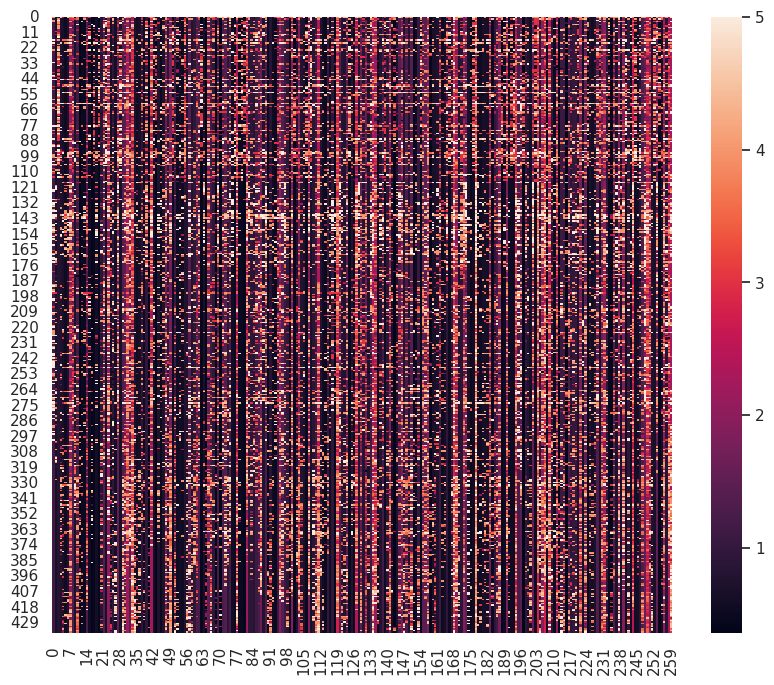

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,8))
sns.heatmap(utility_matrix)
plt.show()

At this point, we can reapply the Content-based method above to find a unique suggestion model for each user.

Please refer to the code above to try the User-based method.


In [ ]:
# create utility matrix
utility_matrix = df.pivot_table(index=['movieId'], columns=['userId'], values='rating').reset_index(drop=True)
utility_matrix.fillna(0, inplace=True)
utility_matrix = utility_matrix.values
print(utility_matrix.shape)

(436, 260)


In [ ]:
# user-based
from tqdm.notebook import tqdm

user_len = df["userId"].unique().shape[0]
user_to_user_similarity_matrix = np.zeros((user_len, user_len))

for i in tqdm(range(user_len)):
  for j in range(user_len):
    user_1 = utility_matrix[i]
    user_2 = utility_matrix[j]
    index_not_zero = (user_1 > 0) & (user_2 > 0)
    user_to_user_similarity_matrix[i,j] = cosine(user_1[index_not_zero], user_2[index_not_zero])

  0%|          | 0/260 [00:00<?, ?it/s]

In [ ]:
zero_rating_indices = np.where(utility_matrix == 0)
zero_rating_indices

for index in range(len(zero_rating_indices[0])):
  i = zero_rating_indices[0][index]
  j = zero_rating_indices[1][index]

  similarity_users = user_to_user_similarity_matrix[j,:]
  ratings = temp[i,:]

  corelation = (similarity_users @ ratings) / abs(similarity_items).sum()
  utility_matrix[i][j] = corelation